# Chennai House Price Prediction


####Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

####Data
The historical sale data is available here. The features of the house and the sale price are given in two different datasets - participants must merge them to do further analysis.

####Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.



In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Dataset
df = pd.read_csv("train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
# Looking into the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [4]:
df.shape

(7109, 22)

In [5]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


# DATA CLEANING

In [6]:
# Checking for Null values
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

We can see that there are null values in N_BEDROOM, N_Bathroom and QS_OVERALL.

In [7]:
# Filling the Null Values of QS_OVERALL with its mean value
df['QS_OVERALL'] = df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

In [8]:
df[df.QS_OVERALL.isna()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [9]:
# Checking the N_BEDROOM null value
df[df.N_BEDROOM.isna()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4060,P01066,Anna Nagar,1556,16-01-2013,181,NaN,1.0,4,Partiall,No,23-01-1986,House,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790


In [10]:
df[(df.AREA=='Anna Nagar') & (df.N_ROOM==4) & (df.N_BATHROOM==1)]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
34,P05950,Anna Nagar,1709,22-11-2009,130,1.0,1.0,4,Family,No,24-11-2003,Others,NoSeWa,Gravel,RH,4.8,3.2,4.3,4.200,452501,90500,12928590
47,P06006,Anna Nagar,1710,12-11-2009,15,1.0,1.0,4,Normal Sale,Yes,15-11-1998,Commercial,AllPub,Gravel,RH,2.7,4.0,2.2,2.825,808639,161728,20215970
65,P01247,Anna Nagar,1600,30-09-2012,154,1.0,1.0,4,Family,Yes,06-10-1991,House,ELO,Gravel,RH,3.9,2.7,2.5,3.040,309941,166891,11920820
75,P03590,Anna Nagar,1792,21-02-2011,41,1.0,1.0,4,Family,Yes,26-02-1990,House,ELO,Gravel,RM,2.7,2.6,2.0,2.395,514532,250313,13906270
101,P08848,Anna Nagar,1622,26-07-2007,147,1.0,1.0,4,Family,Yes,27-07-2002,House,ELO,Gravel,RL,4.4,3.7,4.2,4.145,378840,209015,13063450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047,P00748,Anna Nagar,1598,20-08-2013,121,1.0,1.0,4,AdjLand,Yes,31-08-1968,House,ELO,Paved,RM,2.5,4.6,2.3,2.945,508658,203463,12716450
7052,P02116,Anna Nagar,1508,08-12-2011,63,1.0,1.0,4,AbNormal,No,18-12-1970,Others,NoSewr,No Access,RH,2.0,3.4,4.3,3.270,373074,165811,10363160
7070,P01473,Anna Nagar,1514,16-04-2012,72,1.0,1.0,4,AdjLand,No,24-04-1980,House,NoSewr,No Access,RM,4.5,4.4,5.0,4.675,330127,91070,11383690
7078,P00469,Anna Nagar,1622,24-03-2014,109,1.0,1.0,4,AbNormal,Yes,28-03-1999,Others,AllPub,No Access,RL,3.4,4.4,2.9,3.450,355700,118567,13174060


There are 472 houses in Anna Nagar which has N_ROOM=4 and N_BATHROOM=1.
So we can fill the null value as 1.

In [11]:
df.N_BEDROOM.fillna(1.0,inplace=True)

In [12]:
df[df.N_BEDROOM.isna()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [13]:
# Checking the N_BATHROOM null values
df[df.N_BATHROOM.isna()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,22-03-2010,39,1.0,NaN,4,Partial,No,02-04-1966,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.160000,451857,85486,12212350
5087,P01333,Chrompet,1016,02-08-2012,105,1.0,NaN,3,AbNormal,Yes,10-08-1980,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.240000,330086,106479,10647920
6134,P01332,Chormpet,916,02-08-2012,173,1.0,NaN,3,Normal Sale,Yes,12-08-1974,Others,ELO,Paved,RL,3.4,3.5,3.0,3.503254,265423,44237,8847420
6371,P01189,Chrompet,1035,06-11-2012,90,1.0,NaN,3,Partial,No,14-11-1981,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.050000,223403,24823,8274200
6535,P09189,Anna Nagar,1864,05-03-2007,184,2.0,NaN,5,Family,Yes,07-03-1997,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.960000,575606,124455,15556920


In [14]:
df[(df.AREA=='Chrompet')&(df.N_BEDROOM==1)&(df.N_ROOM==3)].N_BATHROOM.value_counts()

1.0    1128
Name: N_BATHROOM, dtype: int64

We can see here that there are 1128 houses in Chrompet area with number of bedroom as 1 and number of rooms as 3 which has number of bathrooms as 1. So we can fill that in place of the null value.

In [15]:
df.N_BATHROOM.fillna(1.0,inplace=True)

In [16]:
df[df.N_BATHROOM.isna()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [17]:
# Checking  for duplicated values
df[df.duplicated()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


There are no duplicated values in the dataset.

In [18]:
# Exploring the Dataset
# Removing the ID column from dataset as it is not required.
df = df.drop(['PRT_ID'],axis = 1)
df.columns 

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [19]:
# Checking every Columns 
sorted(df.AREA.unique())

['Adyar',
 'Adyr',
 'Ana Nagar',
 'Ann Nagar',
 'Anna Nagar',
 'Chormpet',
 'Chrmpet',
 'Chrompet',
 'Chrompt',
 'KK Nagar',
 'KKNagar',
 'Karapakam',
 'Karapakkam',
 'T Nagar',
 'TNagar',
 'Velachery',
 'Velchery']

Here we can see that there are some spelling errors which needs to be corrected.

In [20]:
area = {'Chrompt':'Chrompet','Chormpet':'Chrompet','Chrmpet':'Chrompet','TNagar':'T Nagar','Ana Nagar':'Anna Nagar','Karapakam':'Karapakkam','Ann Nagar':'Anna Nagar','Velchery':'Velachery','KKNagar':'KK Nagar','Adyr':'Adyar'}
df.AREA = df.AREA.replace(area)

In [21]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

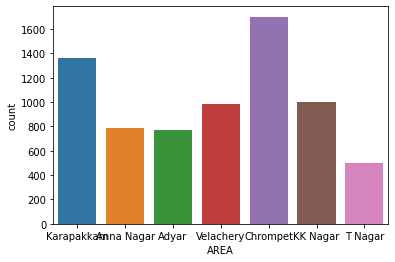

In [22]:
sns.countplot(df['AREA'])

This plot shows the number of houses in each Area. We can see that Chrompet area has the highest number of sales of houses while T Nagar area has the lowest.

In [23]:
df['INT_SQFT'].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   float64
 5   N_BATHROOM     7109 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  REG_FEE 

In [25]:
sorted(df.SALE_COND.unique())

['Ab Normal',
 'AbNormal',
 'Adj Land',
 'AdjLand',
 'Family',
 'Normal Sale',
 'PartiaLl',
 'Partial',
 'Partiall']

Here also there are some spelling errors which needs to be corrected.

In [26]:
cond = {'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'}
df.SALE_COND = df.SALE_COND.replace(cond)

In [27]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

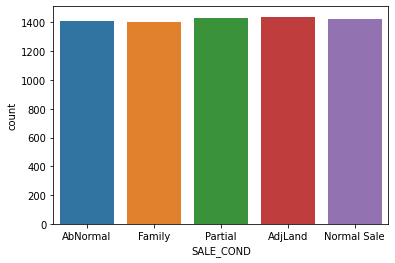

In [28]:
sns.countplot(df['SALE_COND'])

This plot shows the Sale conditions of houses and the number of houses that come under a specific condition.

In [29]:
sorted(df.PARK_FACIL.unique())

['No', 'Noo', 'Yes']

In [30]:
park = {'Noo':'No'}
df.PARK_FACIL = df.PARK_FACIL.replace(park)

In [31]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

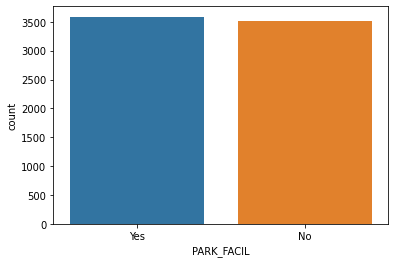

In [32]:
sns.countplot(df['PARK_FACIL'])

This plot shows the number of houses which has Parking facilities and those which don't have those facilities.  

In [33]:
sorted(df.BUILDTYPE.unique())

['Comercial', 'Commercial', 'House', 'Other', 'Others']

In [34]:
df.BUILDTYPE = df.BUILDTYPE.replace({'Comercial':'Commercial','Other':'Others'})

In [35]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

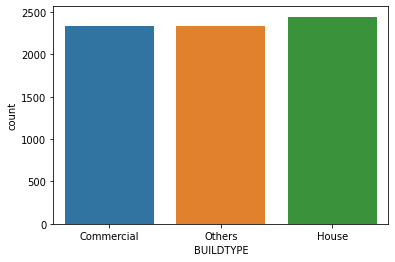

In [36]:
sns.countplot(df['BUILDTYPE'])

This plot shows the Buildtype of houses and the count of it.

In [37]:
sorted(df.UTILITY_AVAIL.unique())

['All Pub', 'AllPub', 'ELO', 'NoSeWa', 'NoSewr ']

In [38]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.replace({'All Pub':'AllPub'})

In [39]:
df.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

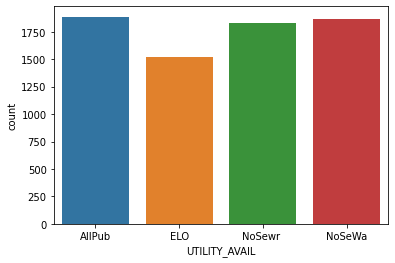

In [40]:
sns.countplot(df['UTILITY_AVAIL'])

This plot shows the utility availability of houses and the count of it.

In [41]:
sorted(df.STREET.unique())

['Gravel', 'No Access', 'NoAccess', 'Pavd', 'Paved']

In [42]:
df.STREET = df.STREET.replace({'NoAccess':'No Access','Pavd':'Paved'})

In [43]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

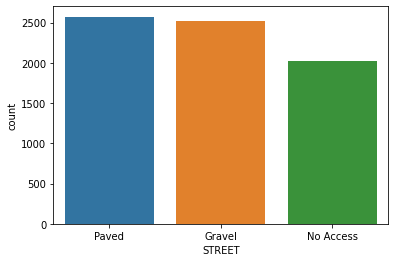

In [44]:
sns.countplot(df['STREET'])

This plot shows the kind of streets and the count of houses that come under that category.

In [45]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

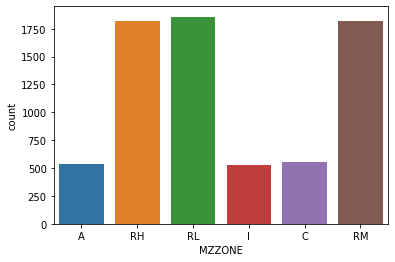

In [46]:
sns.countplot(df['MZZONE'])

This plot shows the count of houses that come under each MZZONE.

In [47]:
# Converting datatype of N_BEDROOM and N_BATHROOM to int 
df.N_BEDROOM = df.N_BEDROOM.astype('int')
df.N_BATHROOM = df.N_BATHROOM.astype('int')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   int64  
 5   N_BATHROOM     7109 non-null   int64  
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  REG_FEE 

In [49]:
df.N_BEDROOM.value_counts()

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

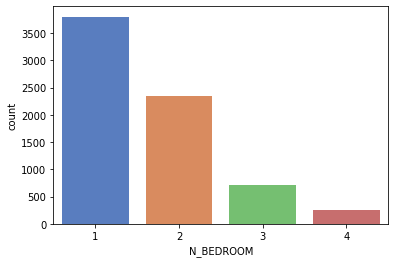

In [50]:
sns.countplot('N_BEDROOM', data=df, palette='muted')

This plot shows the number of bedrooms of houses and the count of it.

In [51]:
df.N_BATHROOM.value_counts()

1    5594
2    1515
Name: N_BATHROOM, dtype: int64

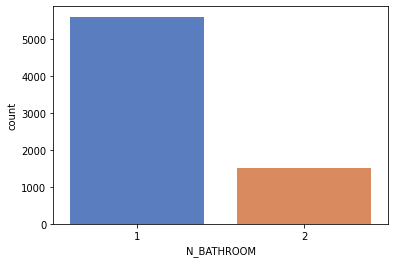

In [52]:
sns.countplot('N_BATHROOM', data=df, palette='muted')

This plot shows the number of bathrooms in houses and the count of it.

In [53]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

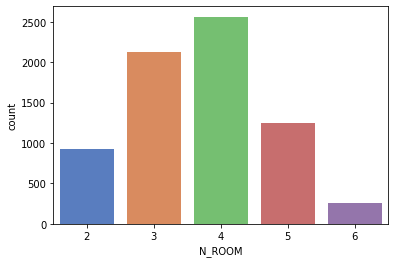

In [54]:
sns.countplot('N_ROOM', data=df, palette='muted')

This plot shows the number of rooms in houses and the count of it.

In [55]:
# Dropping REG_FEE and COMMIS columns
df = df.drop(['REG_FEE','COMMIS'], axis = 1)
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

Here we are dropping the Registration fee and Commission fee columns because from Domain knowledge we know that we can't predict the Registration and Commission fees as they depend upon the locality and people or organisations handling them so it's difficult to predict them. So it's better not to use that data in our final model.  

In [56]:
 # Computing the Age of the House
df.DATE_BUILD = pd.DatetimeIndex(df.DATE_BUILD).year
df.DATE_SALE = pd.DatetimeIndex(df.DATE_SALE).year
df['AGE_BUILDING']= (df.DATE_SALE - df.DATE_BUILD)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_BUILDING
0,Karapakkam,1004,2011,131,1,1,3,AbNormal,Yes,1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,2006,26,2,1,5,AbNormal,No,1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,2012,70,1,1,3,AbNormal,Yes,1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,2010,14,3,2,5,Family,No,1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,2009,84,1,1,3,AbNormal,Yes,1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   int64  
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   int64  
 5   N_BATHROOM     7109 non-null   int64  
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   int64  
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  SALES_PR

In [58]:
df.describe()

,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_BUILDING
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,2009.768181,99.603179,1.636939,1.213110,3.688704,1985.491912,3.517471,3.507244,3.485300,3.503254,1.089491e+07,24.276270
std,457.410902,2.205979,57.403110,0.802881,0.409534,1.019099,12.648859,0.891972,0.897834,0.887266,0.525440,3.768603e+06,12.334164
min,500.000000,2004.000000,0.000000,1.000000,1.000000,2.000000,1949.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000
25%,993.000000,2008.000000,50.000000,1.000000,1.000000,3.000000,1976.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,14.000000
50%,1373.000000,2010.000000,99.000000,1.000000,1.000000,4.000000,1986.000000,3.500000,3.500000,3.500000,3.503254,1.033505e+07,23.000000
75%,1744.000000,2011.000000,148.000000,2.000000,1.000000,4.000000,1996.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07,34.000000
max,2500.000000,2015.000000,200.000000,4.000000,2.000000,6.000000,2010.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.000000


# EXPLORATORY DATA ANALYSIS

In [59]:
### Visualising the Data
# Finding the numerical features and categorical features

numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))


Number of Numerical features:  13
Number of Categorical features:  7


In [60]:
df[numerical_feats].head()

,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_BUILDING
0,1004,2011,131,1,1,3,1967,4.0,3.9,4.9,4.330,7600000,44
1,1986,2006,26,2,1,5,1995,4.9,4.2,2.5,3.765,21717770,11
2,909,2012,70,1,1,3,1992,4.1,3.8,2.2,3.090,13159200,20
3,1855,2010,14,3,2,5,1988,4.7,3.9,3.6,4.010,9630290,22
4,1226,2009,84,1,1,3,1979,3.0,2.5,4.1,3.290,7406250,30


In [61]:
df[categorical_feats].head()

,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,Karapakkam,AbNormal,Yes,Commercial,AllPub,Paved,A
1,Anna Nagar,AbNormal,No,Commercial,AllPub,Gravel,RH
2,Adyar,AbNormal,Yes,Commercial,ELO,Gravel,RL
3,Velachery,Family,No,Others,NoSewr,Paved,I
4,Karapakkam,AbNormal,Yes,Others,AllPub,Gravel,C


In [62]:
# A general description of our target Sales Price
df['SALES_PRICE'].describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

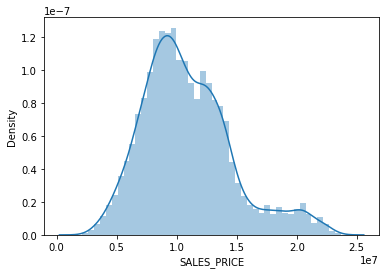

In [63]:
sns.distplot(df['SALES_PRICE'])

From the above observation, we can see the 'SalePrice' is a little right skewed which are the outliers, i.e the expensive price range.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7905be72d0>,
      dtype=object)

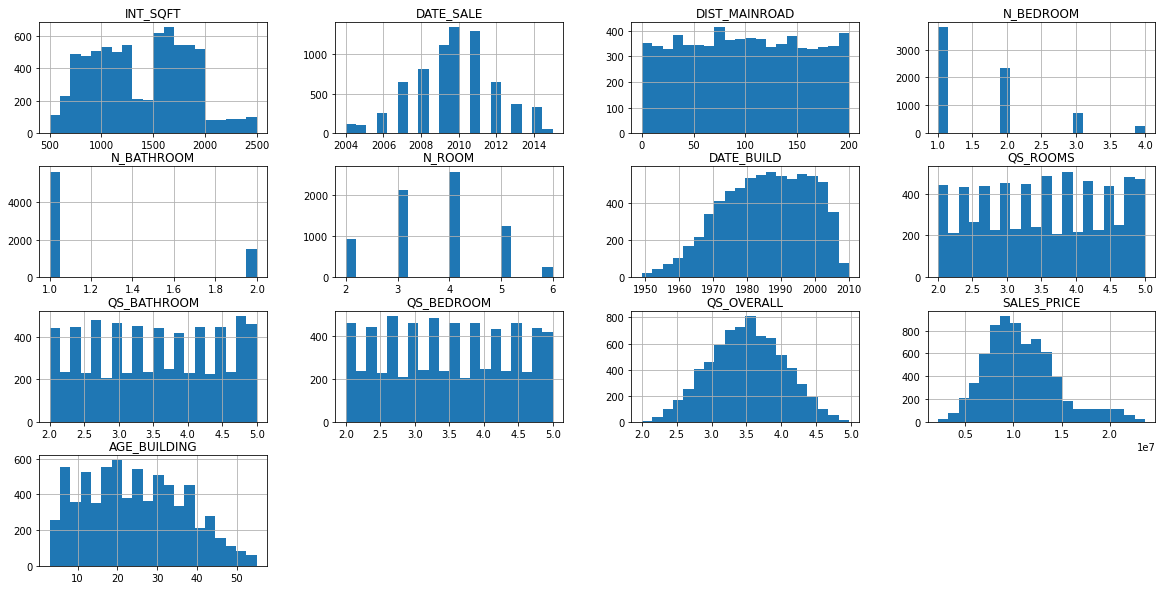

In [64]:
df[numerical_feats].hist(bins=20, figsize=(20, 10))


The above observations shows the distribution of each numerical features.

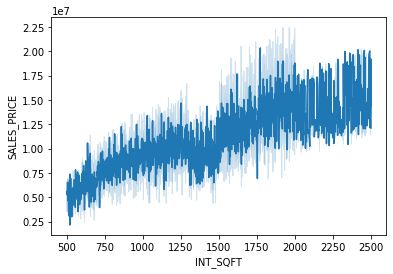

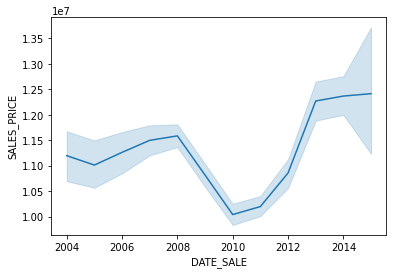

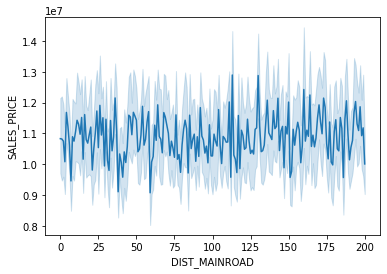

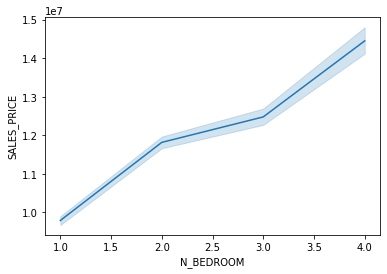

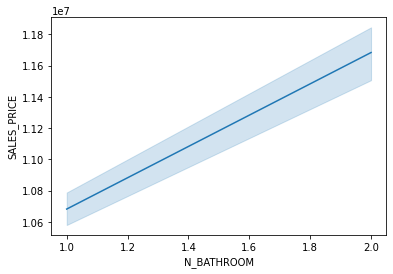

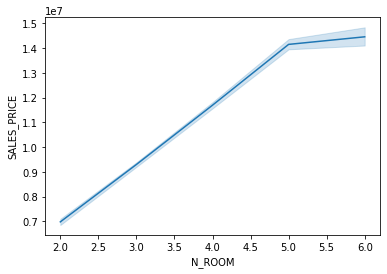

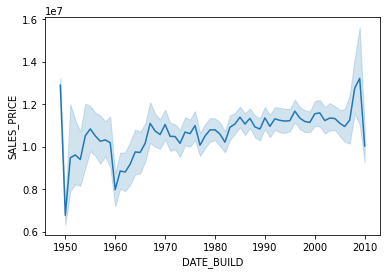

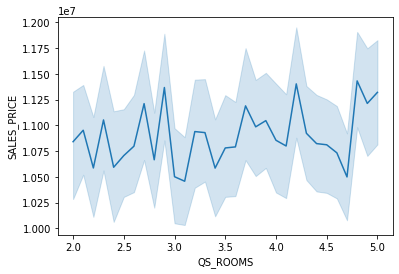

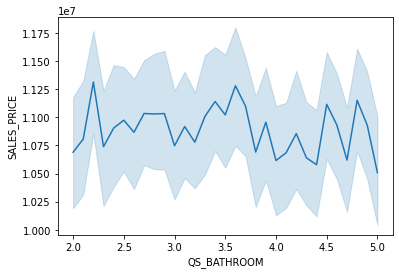

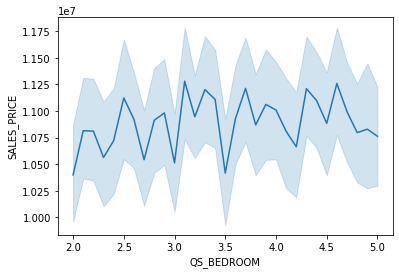

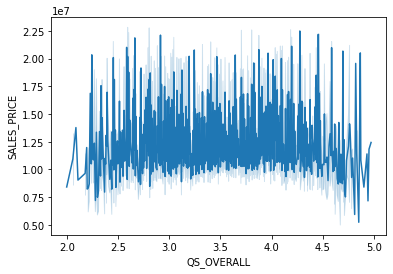

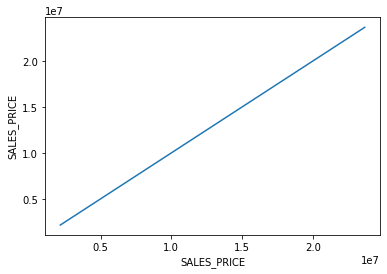

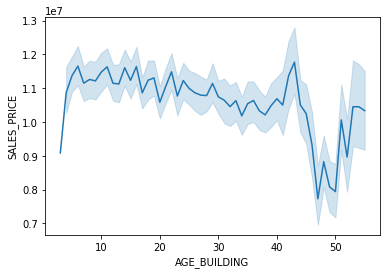

In [65]:
# Analysing relationships between the numerical features and the target SALES PRICE

for i in df[numerical_feats]:
  sns.lineplot(x= df[i], y= df['SALES_PRICE'],data = df)
  plt.show()

From the above observations, we can see that there is a linear relationship in INT_SQFT, N_BATHROOMS, N_BEDROOMS and N_ROOMS. The other features like Date Sale, Date Build, Dist Mainroad and all QS features can be dropped since they don't show a linear pattern. 

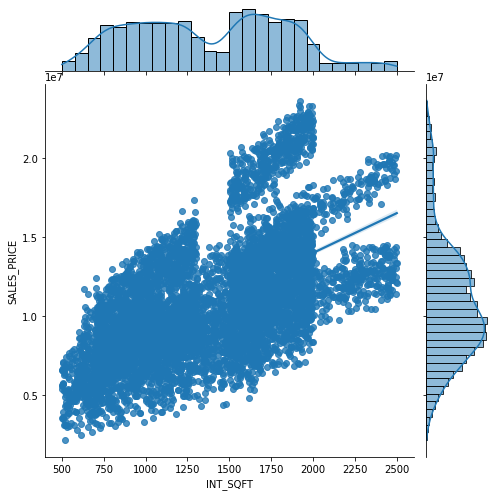

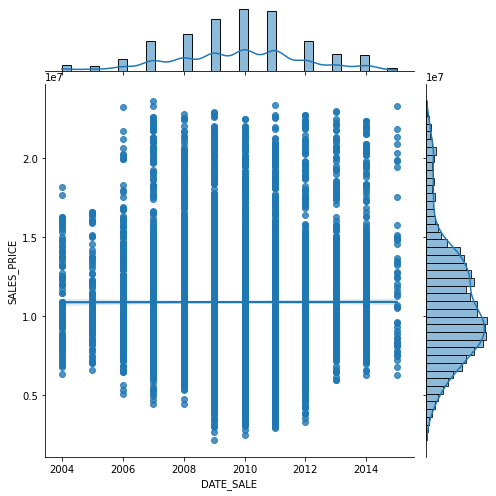

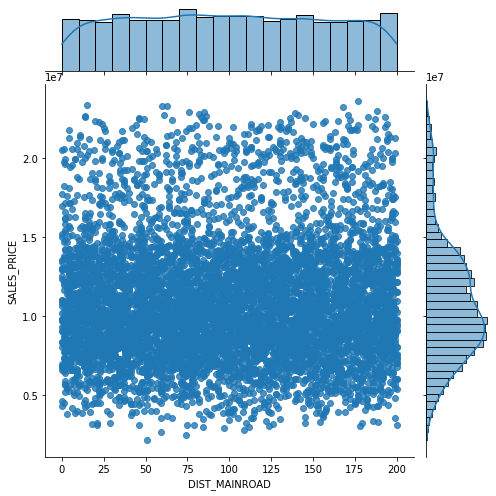

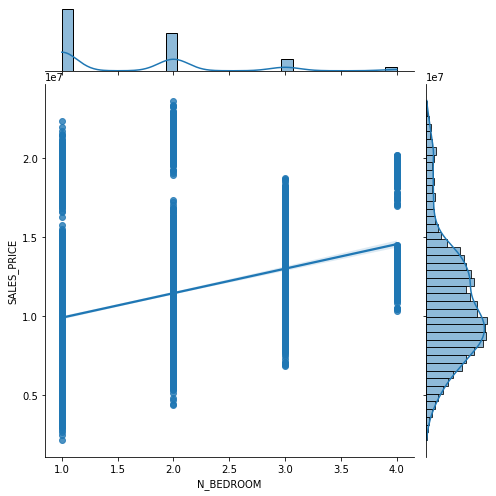

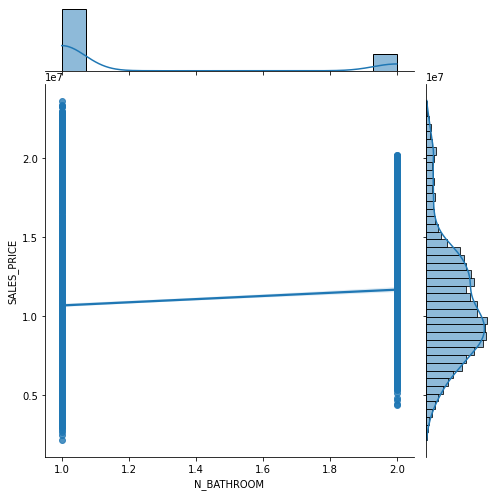

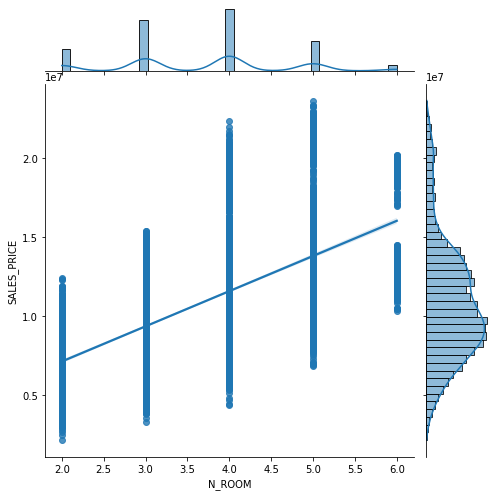

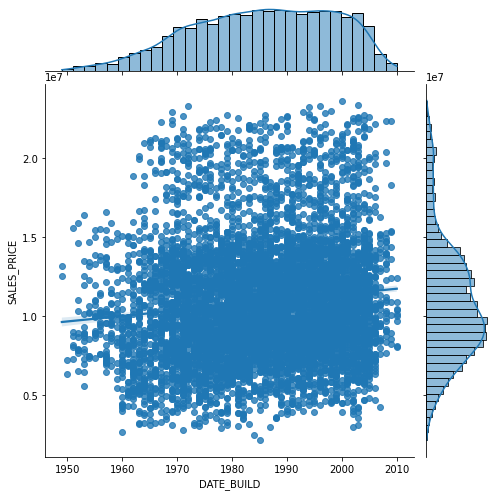

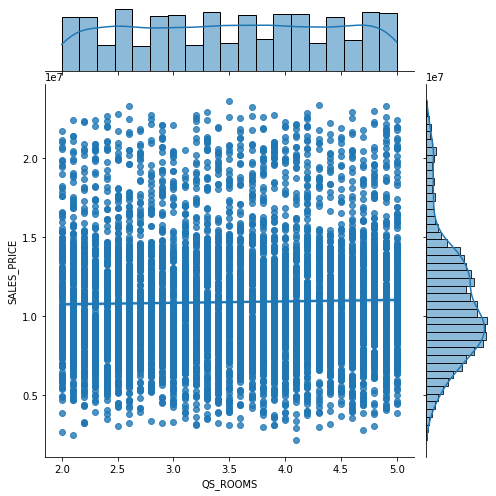

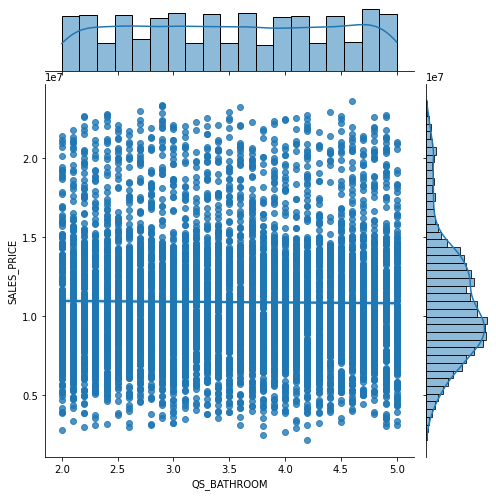

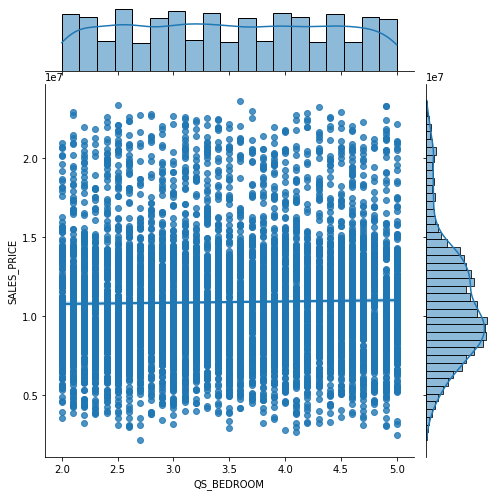

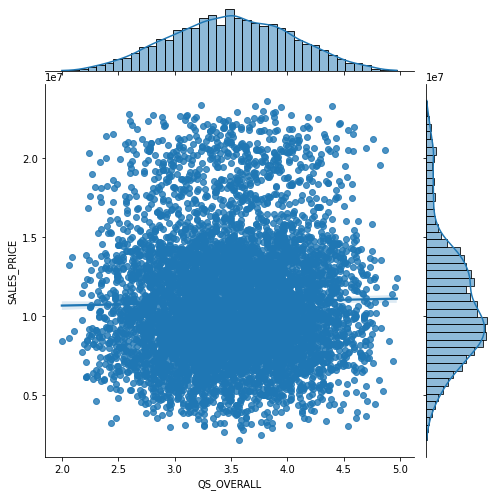

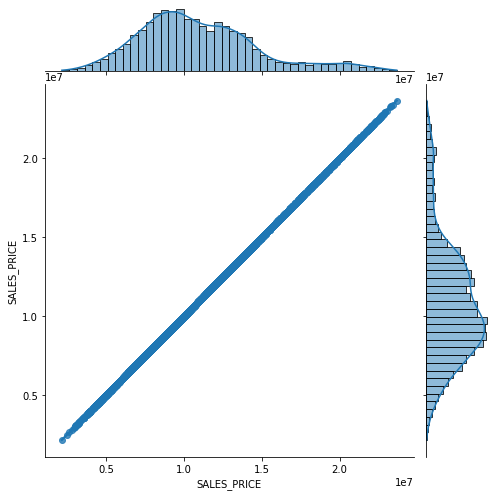

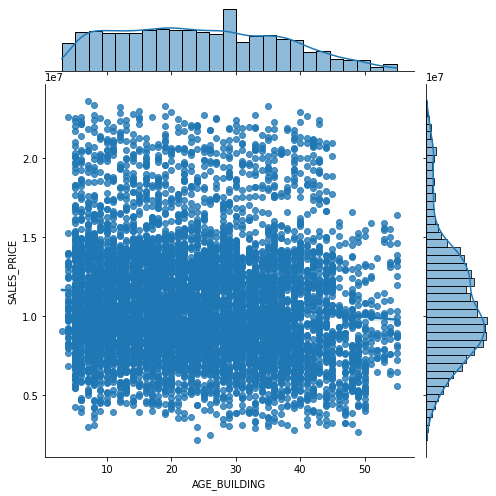

In [66]:
for i in df[numerical_feats]:
  sns.jointplot(x= df[i], y= df['SALES_PRICE'],data = df,kind='reg',size=7)
  plt.show()

From this observation it is really clear to us that the INT_SQFT and N_ROOMS show a linear relationship. There is a positive relationship between INT_SQFT and the SALES_PRICE as well as N_ROOMS and SALES_PRICE.  In other words, the larger the internal square feet of a house or larger the number of rooms,  the sale price will be higher.

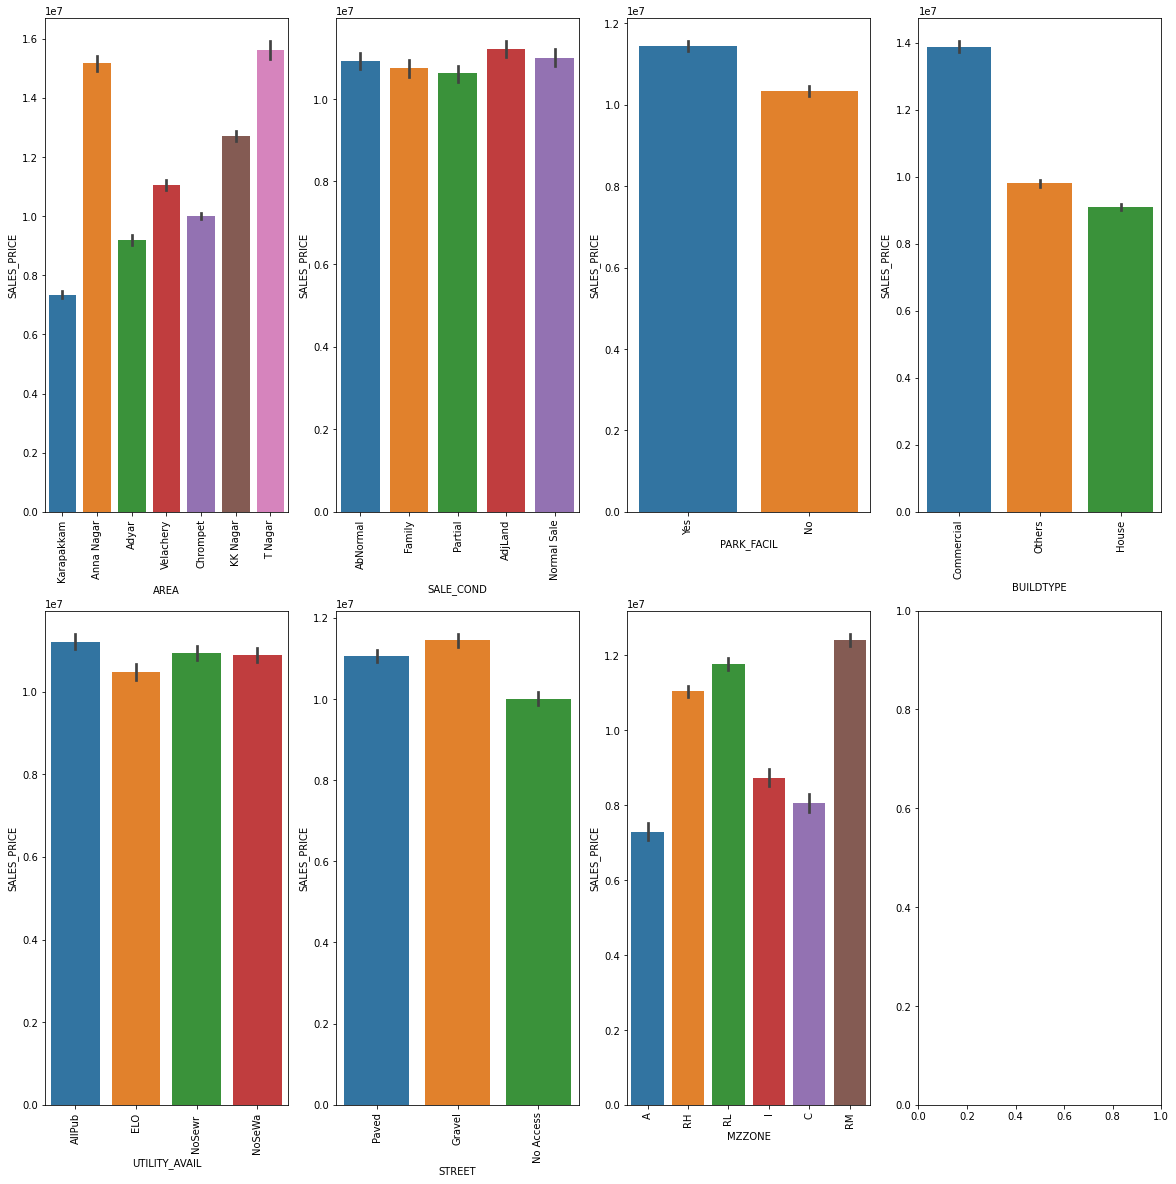

In [67]:
# Analysing the categorical features and the target SALES PRICE

fig,ax = plt.subplots(2,4,figsize=(20,20))
for variable, subplot in zip(categorical_feats, ax.flatten()):
  sns.barplot(x= df[variable],y = df['SALES_PRICE'], ax = subplot)
  for label in subplot.get_xticklabels():
    label.set_rotation(90)

From the above observations we can conclude that,
(a) The houses in T NAGAR had the highest sale prices while Karapakkam had the lowest.
(b) In the sale conditions, houses that had adjoining land were sold for a higher price while Partial had the lowest sale price.
(c) Houses with parking facilities had higher sale price.
(d) Commercial type houses had higher sale price while the normal house type had lower sale price.
(e) Houses that had all public access and utilities had a higher sale price.
(f) Gravelled streets had a higher sale price while no access to streets had lower sale price.
(g) Houses in the RM MZZONE had the highest sale price while A MZZONE had the lowest sale price. 

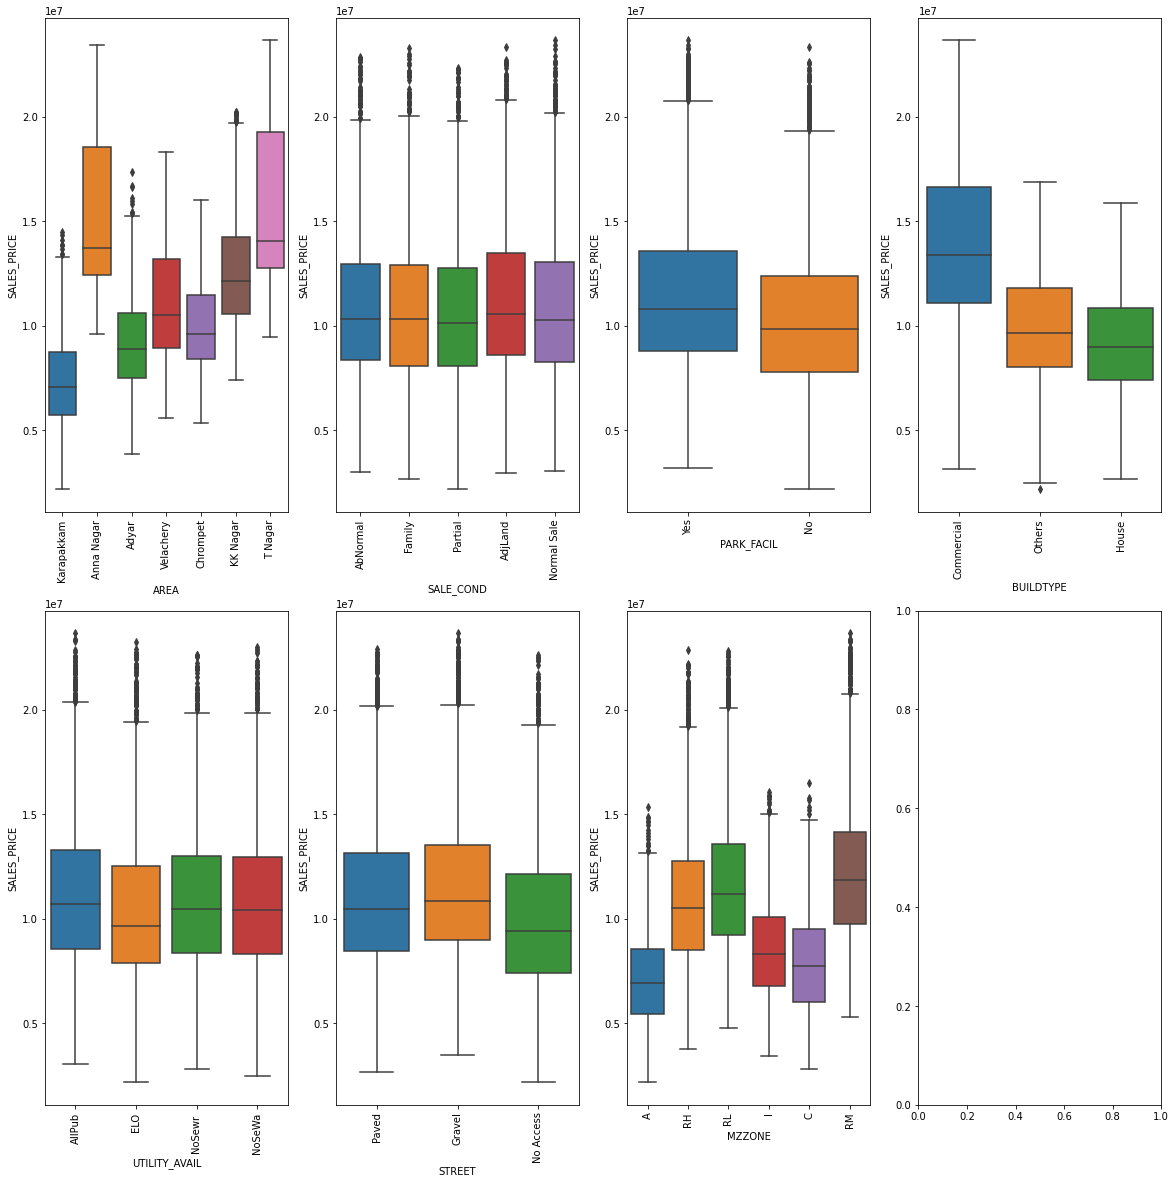

In [68]:
fig, ax = plt.subplots(2, 4, figsize=(20,20))
for var, subplot in zip(categorical_feats, ax.flatten()):
    sns.boxplot(x= var, y= df['SALES_PRICE'], data= df, ax=subplot)
    for label in subplot.get_xticklabels():
      label.set_rotation(90)

From the above plots also we can come to the same conclusion as mentioned above.

In [69]:
# Dropping the Date sale and Date Build columns 
df.drop(['DATE_SALE','DATE_BUILD'],axis=1,inplace=True)
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_BUILDING
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [70]:
# Applying one hot encoding to the categorical features
df = pd.get_dummies(df,drop_first=True)
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_BUILDING,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,PARK_FACIL_Yes,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1,1,3,4.0,3.9,4.9,4.330,7600000,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,1986,26,2,1,5,4.9,4.2,2.5,3.765,21717770,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,909,70,1,1,3,4.1,3.8,2.2,3.090,13159200,20,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,1855,14,3,2,5,4.7,3.9,3.6,4.010,9630290,22,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
4,1226,84,1,1,3,3.0,2.5,4.1,3.290,7406250,30,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0


In [71]:
# Checking the correlation of each feature with the target SALES_PRICE
df.corr().iloc[[9]]

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_BUILDING,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,PARK_FACIL_Yes,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
SALES_PRICE,0.612125,0.018783,0.330987,0.108834,0.60276,0.021967,-0.011377,0.018804,0.020485,1.0,-0.118842,0.40039,-0.131183,0.193062,-0.460068,0.34502,0.016186,0.042032,-0.020856,0.013178,-0.03714,0.146428,-0.344982,-0.201783,-0.058934,-0.00029,0.004818,-0.149341,0.032493,-0.218441,-0.161581,0.022598,0.137466,0.235134


In [72]:
# Sorting the correlation
df.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE              1.000000
INT_SQFT                 0.612125
N_ROOM                   0.602760
AREA_Anna Nagar          0.400390
AREA_T Nagar             0.345020
N_BEDROOM                0.330987
MZZONE_RM                0.235134
AREA_KK Nagar            0.193062
PARK_FACIL_Yes           0.146428
MZZONE_RL                0.137466
N_BATHROOM               0.108834
SALE_COND_AdjLand        0.042032
STREET_Paved             0.032493
MZZONE_RH                0.022598
QS_ROOMS                 0.021967
QS_OVERALL               0.020485
QS_BEDROOM               0.018804
DIST_MAINROAD            0.018783
AREA_Velachery           0.016186
SALE_COND_Normal Sale    0.013178
UTILITY_AVAIL_NoSewr     0.004818
UTILITY_AVAIL_NoSeWa    -0.000290
QS_BATHROOM             -0.011377
SALE_COND_Family        -0.020856
SALE_COND_Partial       -0.037140
UTILITY_AVAIL_ELO       -0.058934
AGE_BUILDING            -0.118842
AREA_Chrompet           -0.131183
STREET_No Access        -0.149341
MZZONE_I      

From this it is clear that INT_SQFT, N_ROOMS and AREA decides the SALES_PRICE. 

# Creation of Model

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from time import time

In [74]:
X = df.drop('SALES_PRICE',axis=1)
y = df.SALES_PRICE

The training dataset and test dataset must be similar, usually have the same predictors or variables. They differ on the observations and specific values in the variables. If you fit the model on the training dataset, then you implicitly minimize error or find correct responses. The fitted model provides a good prediction on the training dataset. Then you test the model on the test dataset. If the model predicts good also on the test dataset, you have more confidence. You have more confidence since the test dataset is similar to the training dataset, but not the same nor seen by the model. It means the model transfers prediction or learning in real sense.

So,by splitting dataset into training and testing subset, we can efficiently measure our trained model since it never sees testing data before.Thus it's possible to prevent overfitting.

I am just splitting dataset into 20% of test data and remaining 80% will used for training the model.

In [75]:
# Splitting the Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [76]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [77]:
# Fitting the model
start = time()
regressor = LinearRegression()
model_lr = regressor.fit(X_train_scaled, y_train)
end = time()
train_time_linear_reg = end - start

In [78]:
# Prediction of Model
from sklearn.metrics import explained_variance_score
y_pred = regressor.predict(X_test_scaled) 
y_pred

array([13858215.81918398, 13030077.00881475, 18257437.5946305 , ...,
       13415698.66112365, 15702096.74712635,  7837451.95308636])

In [79]:
exp_var_score_linear_reg = explained_variance_score(y_pred,y_test)

In [80]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
3913,13376150,1.385822e+07
2726,12857440,1.303008e+07
6220,19124310,1.825744e+07
2716,4905000,4.034389e+06
5459,13534450,1.358890e+07
...,...,...
3524,9987005,1.161640e+07
3010,5821000,5.593335e+06
66,13364730,1.341570e+07
1642,17115030,1.570210e+07


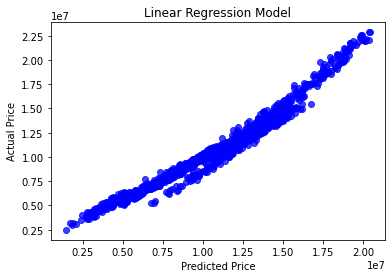

In [81]:
plt.scatter(y_pred,y_test,alpha=0.75,color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [82]:
# Evaluation Metric
from sklearn import metrics 
print('R2-SCORE:', metrics.r2_score(y_test,y_pred))

R2-SCORE: 0.9566463620342708


In [83]:
reg_score = regressor.score(X_test_scaled,y_test)

In [84]:
kf = KFold(n_splits=10,shuffle=True)
cs = cross_val_score(regressor,X_train_scaled,y_train,cv=kf)

In [85]:
# Cross Validation Score
cs.mean()

0.9574769772140641

In [86]:
# Random Forest Regressor Model
start = time()
rr = RandomForestRegressor(n_estimators=400).fit(X_train_scaled,y_train)
end = time()
train_time_rf_reg = end - start
rf_pred = rr.predict(X_test_scaled)
rf_reg_score = rr.score(X_test_scaled,y_test)
rf_reg_score

0.9748540152100351

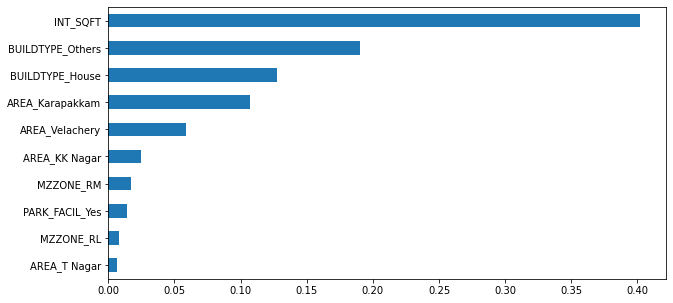

In [87]:
# Finding the feature importance
feat_importances = pd.Series(rr.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10,5))

Important features are INT_SQFT, BUILDTYPE and AREA.

In [88]:
exp_var_score_rf_reg = explained_variance_score(rf_pred,y_test)

In [89]:
# XG Boost Regressor Model
start = time()
xx = XGBRegressor().fit(X_train_scaled,y_train)
end = time()
train_time_xgb_reg = end - start
xgb_reg_pred = xx.predict(X_test_scaled)
xgb_score = xx.score(X_test_scaled,y_test)
xgb_score

[04:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9802760602155673

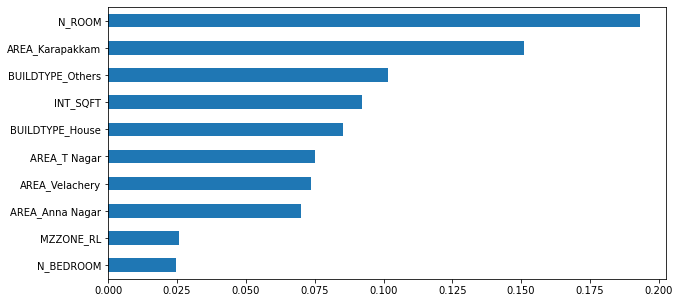

In [90]:
feat_importances = pd.Series(xx.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10,5))

Important features are N_ROOM, AREA, BUILDTYPE and INT_SQFT.

In [91]:
exp_var_score_xgb_reg = explained_variance_score(xgb_reg_pred,y_test)

# FEATURE SELECTION
This is a Model-based approach for selecting the features using the tree-based supervised models to make decisions on the importance of the features. The Extra Tree Regressor is an ensemble algorithm that seeds multiple tree models constructed randomly from the training dataset and sorts out the features that have been most voted for. It fits each decision tree on the whole dataset rather than a bootstrap replica and picks out a split point at random to split the nodes.
The splitting of nodes occurring at every level of the constituent decision trees is based on the measure of randomness or entropy in the sub-nodes. The nodes are split on all variables available in the dataset and the split that results in the most homogenous sub-child is selected in the constituent tree models. This lowers the variance and makes the model less prone to overfitting.

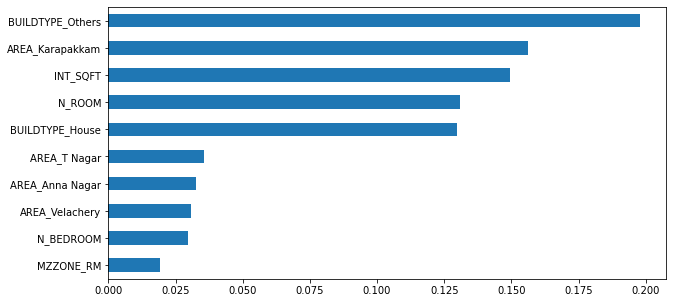

In [92]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train_scaled,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10,5))

From the above observation we know that the most important features that decides the Sales Price are BUILDTYPE, INT_SQFT, N_ROOMS and AREA. 

In [93]:
models_cross = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest Regressor','XGBoost Regressor'],
    'Score': [reg_score,rf_reg_score,xgb_score],
    'Variance Score': [exp_var_score_linear_reg,exp_var_score_rf_reg,exp_var_score_xgb_reg]})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score,Variance Score
2,XGBoost Regressor,0.980276,0.978355
1,Random Forest Regressor,0.974854,0.973655
0,Linear Regression,0.956646,0.956182


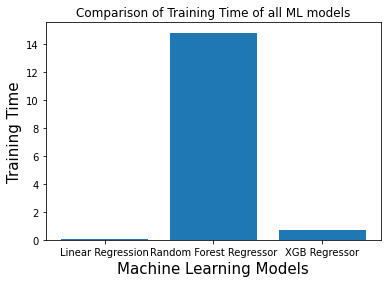

In [94]:
# Analysing Training Time taken by each model

model = ['Linear Regression','Random Forest Regressor', 'XGB Regressor']
Train_Time = [
    train_time_linear_reg,
    train_time_rf_reg,
    train_time_xgb_reg  
]
index = np.arange(len(model))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time', fontsize=15)
plt.xticks(index, model, fontsize=10, )
plt.title('Comparison of Training Time of all ML models')
plt.show()

From the above figure, it is inferred that Linear regressor model has taken negligible amount of time to train where as Random forest has taken maximum time and it is yet obvious because as we increase the number of trees training time will increase so we should look out for optimal model which has greater accuracy and less training time in comparison to the other. So in this case XGB regressor model is the best choice as its accuracy is highest and it is taking less time to train wrt accuracy.

#CONCLUSION
We have seen that score of XGB regressor model is around 98.02% and also achieved decent variance score of 0.97 which is very close to 1 . Therefore, it is inferred that XGB Regressor is the suitable model for this dataset.
*italicized text*

 